In [90]:
import numpy as np
import pandas as pd
import math
import sklearn
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [91]:
path = "C:/Users/prash/Downloads/STOCK MARKET/"

In [92]:
stock = 'RELIANCE'

In [93]:
df = pd.read_csv(path + "MONTHLY SHARE PRICES/" + stock + ".csv")

In [60]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,16.009800,16.943001,11.874600,13.803500,2.072786,3553713872
1,1996-02-01,13.666900,19.129700,13.627800,16.544701,2.484416,6845404770
2,1996-03-01,16.673599,18.586901,15.033600,16.154200,2.425776,5383402631
3,1996-04-01,16.224501,20.500299,16.087900,19.106300,2.869075,4091974935
4,1996-05-01,20.851700,21.078199,17.614599,18.614300,2.795194,5445178207


In [61]:
df = df[['Open','Close',"High","Low"]]

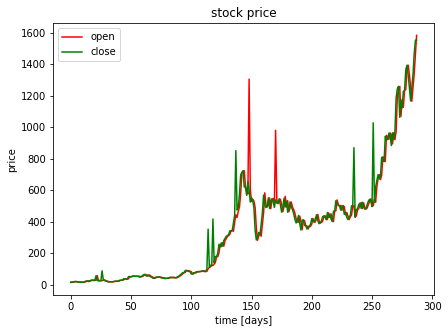

In [62]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='close')
# plt.plot(df.Low.values, color='blue', label='low')
# plt.plot(df.High.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

In [63]:
# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10
seq_len = 20

In [64]:
data_raw = df.as_matrix() # convert to numpy array
data = []

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [88]:
np.array(df.iloc[:,0])

array([  16.0098  ,   13.6669  ,   16.673599,   16.224501,   20.8517  ,
         18.9774  ,   16.482201,   17.021099,   16.564301,   14.9945  ,
         15.8887  ,   14.0769  ,   16.3612  ,   20.266001,   23.9834  ,
         18.926701,   23.975599,   23.702299,   29.051901,   28.1889  ,
         25.8304  ,   28.192801,   56.705799,   24.537901,   26.060801,
         24.2099  ,   25.115801,   27.724199,   30.067101,   26.396601,
         22.023199,   21.0938  ,   16.697001,   18.516701,   17.1968  ,
         17.446699,   18.743099,   20.5394  ,   22.648001,   20.445601,
         21.3125  ,   26.256001,   27.677401,   27.8179  ,   30.527901,
         37.4394  ,   36.720901,   34.799801,   37.095798,   51.668598,
         49.200699,   51.176601,   54.355099,   53.433601,   52.793201,
         52.480801,   52.933701,   53.1134  ,   48.490101,   51.075001,
         53.105499,   59.899899,   64.976196,   60.3685  ,   53.4179  ,
         61.422798,   57.916302,   50.1301  ,   48.576   ,   41.

In [65]:
# create all possible sequences of length seq_len
for index in range(len(data_raw) - seq_len): 
    data.append(data_raw[index: index + seq_len])

In [76]:
data

array([[[  16.0098  ,   13.8035  ,   16.943001,   11.8746  ],
        [  13.6669  ,   16.544701,   19.1297  ,   13.6278  ],
        [  16.673599,   16.1542  ,   18.586901,   15.0336  ],
        ...,
        [  23.702299,   28.7668  ,   30.4576  ,   23.471901],
        [  29.051901,   28.1147  ,   29.4345  ,   26.7285  ],
        [  28.1889  ,   25.7952  ,   30.106199,   25.6078  ]],

       [[  13.6669  ,   16.544701,   19.1297  ,   13.6278  ],
        [  16.673599,   16.1542  ,   18.586901,   15.0336  ],
        [  16.224501,   19.1063  ,   20.500299,   16.0879  ],
        ...,
        [  29.051901,   28.1147  ,   29.4345  ,   26.7285  ],
        [  28.1889  ,   25.7952  ,   30.106199,   25.6078  ],
        [  25.8304  ,   28.2279  ,   28.3451  ,   25.771799]],

       [[  16.673599,   16.1542  ,   18.586901,   15.0336  ],
        [  16.224501,   19.1063  ,   20.500299,   16.0879  ],
        [  20.8517  ,   18.6143  ,   21.078199,   17.614599],
        ...,
        [  28.1889  ,   25.

In [71]:
data = np.array(data)
valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]))
train_set_size = data.shape[0] - (valid_set_size + test_set_size)
print (valid_set_size,test_set_size)
print (data.shape[0])

27 27
268


In [72]:
df_train = data[:train_set_size,:,:]
df_valid = data[train_set_size:train_set_size+valid_set_size,:,:]
df_test = data[train_set_size+valid_set_size:,:,:]

In [73]:
x_train = df_train[:,:-1,:]
y_train = df_train[:,-1,:]

x_valid = df_valid[:,:-1,:]
y_valid = df_valid[:,-1,:]

x_test = df_test[:,:-1,:]
y_test = df_test[:,-1,:]

In [74]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()

In [75]:
df_train[0] = min_max_scaler.fit_transform(df_train[0].reshape(-1,1))

ValueError: could not broadcast input array from shape (80,1) into shape (20,4)

In [ ]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df['Low'].values.reshape(-1,1))